# PML-CAP10-Gaussian Naive Bayes 

### Load data set

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
X, y = load_iris(return_X_y=True)
dfX = pd.DataFrame(X,columns=["x1","x2","x3","x4"])
dfy = pd.DataFrame(y,columns=["type"])
df=pd.concat([dfX,dfy],axis=1)

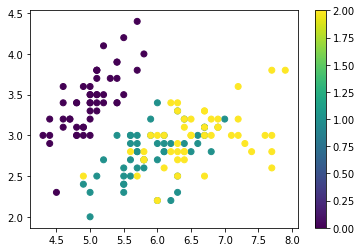

In [36]:
import matplotlib.pyplot as plt
plt.scatter(dfX["x1"],dfX["x2"],c=dfy["type"], cmap='viridis')
plt.colorbar()
plt.show()

### Split Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=df[['x1','x2', 'x3','x4']]
Y=df['type']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=1234)

### Plot Train Values

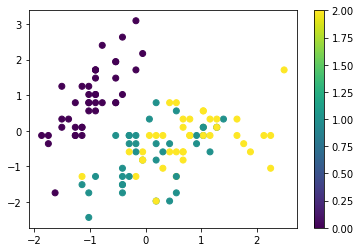

In [39]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:,0],train_x[:,1],c=train_y, cmap='viridis')
plt.colorbar()
plt.show()

### Train Model

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predict Model

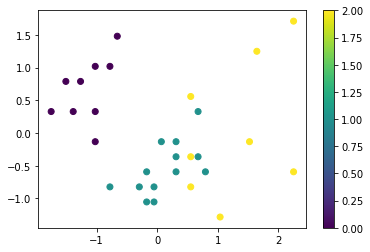

In [40]:
pred_EY=model.predict(test_x)
plt.scatter(test_x[:,0],test_x[:,1],c=pred_EY, cmap='viridis')
plt.colorbar()
plt.show()

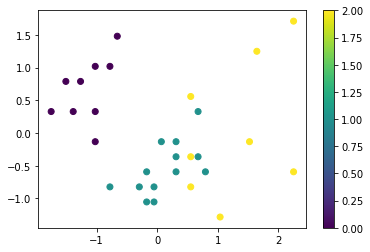

In [25]:
plt.scatter(test_x[:,0],test_x[:,1],c=test_y, cmap='viridis')
plt.colorbar()
plt.show()

### Metrics

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
mconf=confusion_matrix(test_y,pred_EY)
display(mconf)
print(classification_report(test_y,pred_EY))
print(accuracy_score(test_y,pred_EY))

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
